In [2]:
import pandas as pd

In [3]:
train_data = pd.read_csv('data/train.csv')
pd.options.display.max_columns = train_data.shape[1]

## Understanding the data

In [27]:
train_data['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

### Understating Gender variable

In [36]:
train_data['Gender'].value_counts()

Gender
Female    10422
Male      10336
Name: count, dtype: int64

It is very homogenous, will only be necessary to translate female => 0 and male => 1 for the final model

In [34]:
train_data[train_data['Gender'] == 'Female']['NObeyesdad'].value_counts().sort_index()

NObeyesdad
Insufficient_Weight    1621
Normal_Weight          1660
Obesity_Type_I         1267
Obesity_Type_II           8
Obesity_Type_III       4041
Overweight_Level_I     1070
Overweight_Level_II     755
Name: count, dtype: int64

In [35]:
train_data[train_data['Gender'] == 'Male']['NObeyesdad'].value_counts().sort_index()

NObeyesdad
Insufficient_Weight     902
Normal_Weight          1422
Obesity_Type_I         1643
Obesity_Type_II        3240
Obesity_Type_III          5
Overweight_Level_I     1357
Overweight_Level_II    1767
Name: count, dtype: int64

Only 8 cases of Obesity_Type_II in women and 5 in Obesity_Type_III in men. For this challenge, the current classifications must be respected, otherwise merging Obesity_Type_III into Obesity_Type_II could be an interesting approach. 

### Understanding FAVC

In [6]:
train_data['FAVC'].value_counts()

FAVC
yes    18982
no      1776
Name: count, dtype: int64

In [7]:
train_data[train_data['FAVC'] == 'yes']['NObeyesdad'].value_counts().sort_index()

NObeyesdad
Insufficient_Weight    2153
Normal_Weight          2587
Obesity_Type_I         2817
Obesity_Type_II        3194
Obesity_Type_III       4045
Overweight_Level_I     2203
Overweight_Level_II    1983
Name: count, dtype: int64

In [8]:
train_data[train_data['FAVC'] == 'no']['NObeyesdad'].value_counts().sort_index()

NObeyesdad
Insufficient_Weight    370
Normal_Weight          495
Obesity_Type_I          93
Obesity_Type_II         54
Obesity_Type_III         1
Overweight_Level_I     224
Overweight_Level_II    539
Name: count, dtype: int64

Most values represent yes and don't seem to be a real indicative of any of the categories. Might be interesting to delete later.

### Understanding family_history_with_overweight

In [3]:
train_data['family_history_with_overweight'].value_counts()

family_history_with_overweight
yes    17014
no      3744
Name: count, dtype: int64

In [4]:
train_data[train_data['family_history_with_overweight'] == 'yes']['NObeyesdad'].value_counts().sort_index()

NObeyesdad
Insufficient_Weight    1074
Normal_Weight          1790
Obesity_Type_I         2862
Obesity_Type_II        3243
Obesity_Type_III       4045
Overweight_Level_I     1671
Overweight_Level_II    2329
Name: count, dtype: int64

In [5]:
train_data[train_data['family_history_with_overweight'] == 'no']['NObeyesdad'].value_counts().sort_index()

NObeyesdad
Insufficient_Weight    1449
Normal_Weight          1292
Obesity_Type_I           48
Obesity_Type_II           5
Obesity_Type_III          1
Overweight_Level_I      756
Overweight_Level_II     193
Name: count, dtype: int64

family_history_with_overweight == No, seems to indicate that it might be in one of the 2 extremes of this problem, altouugh 'Yes' is much  more uniformly distributed. Might need to study later how eliminating this variable affects the classification result.

### Understanding FCVC

In [13]:
train_data['FCVC'].describe()

count    20758.000000
mean         2.445908
std          0.533218
min          1.000000
25%          2.000000
50%          2.393837
75%          3.000000
max          3.000000
Name: FCVC, dtype: float64

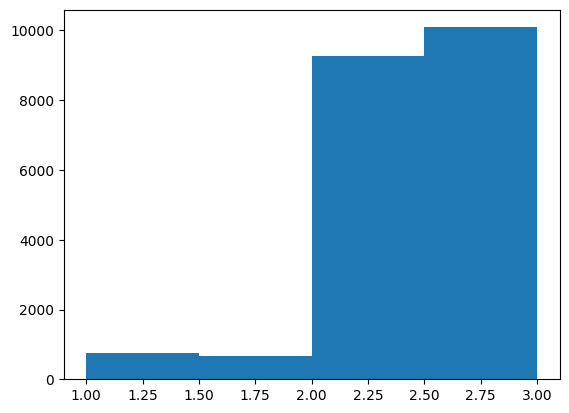

In [15]:
import matplotlib.pyplot as plt
plt.hist(train_data['FCVC'], bins = 4)
plt.show()

In [19]:
train_data[train_data['FCVC'] < 2]['NObeyesdad'].value_counts().sort_index()

NObeyesdad
Insufficient_Weight    261
Normal_Weight           96
Obesity_Type_I         239
Obesity_Type_II        481
Overweight_Level_I     191
Overweight_Level_II    141
Name: count, dtype: int64

In [24]:
train_data.query('FCVC >= 2 and FCVC < 2.5')['NObeyesdad'].value_counts().sort_index()

NObeyesdad
Insufficient_Weight     820
Normal_Weight          1742
Obesity_Type_I         2258
Obesity_Type_II        1169
Overweight_Level_I     1516
Overweight_Level_II    1752
Name: count, dtype: int64

In [25]:
train_data.query('FCVC >= 2.5')['NObeyesdad'].value_counts().sort_index()

NObeyesdad
Insufficient_Weight    1442
Normal_Weight          1244
Obesity_Type_I          413
Obesity_Type_II        1598
Obesity_Type_III       4046
Overweight_Level_I      720
Overweight_Level_II     629
Name: count, dtype: int64